In [4]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 36.5 MB/s eta 0:00:0000:0100:01
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=94531c1a2272981317dd360a3a56ac5a7832c7592b7f24778c449b0082b7d873
  Stored in directory: /Users/prasannasundar/Library/Caches/pip/wheels/0a/f5/dd/9d00836c4e9e279c2a59d5b0ab72dafa66cbc626a327c550dd
Successfully built sentence_transformers
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1


In [3]:
# Import the other required packages and modules.
import pandas as pd
import datetime
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import pipeline
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import semantic_search


# From the IPython.display package, import display and Markdown
from IPython.display import display, Markdown

In [13]:
!pip install torchvision

In [2]:
import torchvision


In [4]:
#read data
runway = pd.read_csv("runway.csv",parse_dates=['review_date']) # parse column as datetime for visualization  
print(runway.info())

print(runway.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      1506 non-null   int64         
 1   item_id      1506 non-null   int64         
 2   rating       1506 non-null   int64         
 3   rented for   1506 non-null   object        
 4   review_text  1506 non-null   object        
 5   category     1506 non-null   object        
 6   height       1503 non-null   object        
 7   size         1506 non-null   int64         
 8   age          1500 non-null   float64       
 9   review_date  1506 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 117.8+ KB
None
   user_id  item_id  rating     rented for  \
0   476109   139086       8  formal affair   
1   203660  1126889       6          party   
2   868581   652189       8        wedding   
3   935076  1879504       8      

In [5]:
## Pre Processing

#remove forward slash 

runway['review_text_cleaned']=runway['review_text'].str.replace(r"\/","")

#remove punctuation
runway['review_text_cleaned']=runway['review_text_cleaned'].str.translate(string.punctuation)


#remove digits
runway['review_text_cleaned']=runway['review_text_cleaned'].str.replace(r"\d+","")

#remove running spaces

runway['review_text_cleaned']=runway['review_text_cleaned'].str.replace(r"\s{2,}","")  #removing 2 or more spaces
#make text lowercase
runway['review_text_cleaned']=runway['review_text_cleaned'].str.lower()

In [6]:
runway['review_text_cleaned'][4]

'super flattering i am usually a sizemi have a dd chest and this dress was so flattering on'

## Sentiment Analysis

In [7]:
#bert based model for sentiment analysis
senti_model = "distilbert-base-uncased-finetuned-sst-2-english" 


#instantiate new pipeline object

sentimentAnalysis = pipeline("sentiment-analysis",model=senti_model)

# Run on cleaned review text


sent_analysis_output = sentimentAnalysis(list(runway["review_text_cleaned"]))

In [8]:
sent_analysis_output

[{'label': 'POSITIVE', 'score': 0.9998089671134949},
 {'label': 'NEGATIVE', 'score': 0.9507229328155518},
 {'label': 'NEGATIVE', 'score': 0.9872165322303772},
 {'label': 'POSITIVE', 'score': 0.9960770010948181},
 {'label': 'NEGATIVE', 'score': 0.9667246341705322},
 {'label': 'POSITIVE', 'score': 0.9882996082305908},
 {'label': 'POSITIVE', 'score': 0.7901303172111511},
 {'label': 'POSITIVE', 'score': 0.9877718687057495},
 {'label': 'POSITIVE', 'score': 0.9967693090438843},
 {'label': 'POSITIVE', 'score': 0.9960691928863525},
 {'label': 'NEGATIVE', 'score': 0.9993739724159241},
 {'label': 'NEGATIVE', 'score': 0.7370160818099976},
 {'label': 'NEGATIVE', 'score': 0.8242039680480957},
 {'label': 'NEGATIVE', 'score': 0.6067951321601868},
 {'label': 'POSITIVE', 'score': 0.9996150732040405},
 {'label': 'POSITIVE', 'score': 0.995503842830658},
 {'label': 'NEGATIVE', 'score': 0.9917631149291992},
 {'label': 'POSITIVE', 'score': 0.9996963739395142},
 {'label': 'POSITIVE', 'score': 0.9978191852569

## Histogram of Sentiment Score




Text(0.5, 1.0, 'For Clean Review Text')

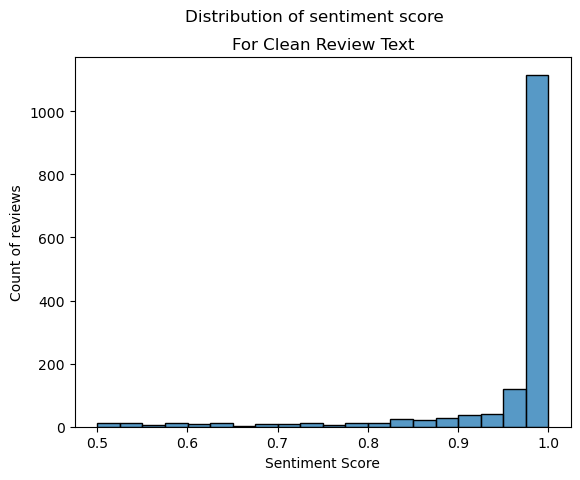

In [10]:

#parse output as sentiment category label and score
runway['clean_sentiment_category'] = [s['label'] for s in sent_analysis_output]
runway['clean_sentiment_score'] = [s['score'] for s in sent_analysis_output]



sns.histplot(data=runway,x="clean_sentiment_score",bins=20)

plt.suptitle("Distribution of sentiment score")

plt.xlabel("Sentiment Score")

plt.ylabel("Count of reviews")


plt.title("For Clean Review Text")

In [ ]:
#insight
# Most reviews are positive

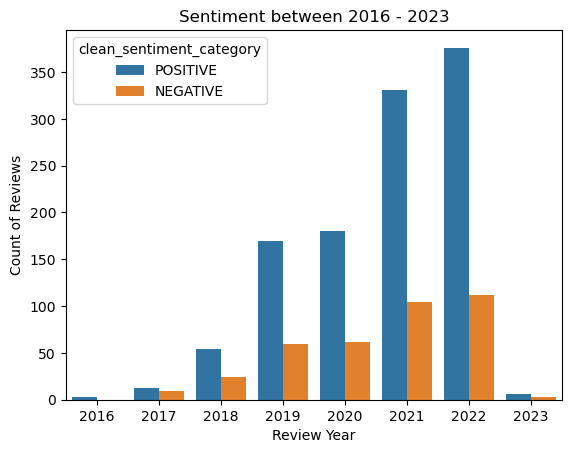

In [19]:
#analyze reviews by year

chart_data = runway.groupby(['year', 'clean_sentiment_category'], as_index=False)['user_id'].count()
chart_data.columns = ['year', 'clean_sentiment_category', 'cnt']

# Create a bar plot showing the count of reviews for each sentiment category over the years.
sns.barplot(data=chart_data, x="year", y="cnt", hue="clean_sentiment_category", errorbar = None)
plt.title("Sentiment between 2016 - 2023")
plt.xlabel("Review Year")
plt.ylabel("Count of Reviews")
plt.show()

In [20]:
# Reviews have increased every year until 2022. The % of positive reviews also has been on an increeasing trend. 2021 was a game changer!

,year,clean_sentiment_category,cnt
0,2016,POSITIVE,3
1,2017,NEGATIVE,9
2,2017,POSITIVE,12
3,2018,NEGATIVE,24
4,2018,POSITIVE,54
5,2019,NEGATIVE,60
6,2019,POSITIVE,170
7,2020,NEGATIVE,62
8,2020,POSITIVE,180
9,2021,NEGATIVE,104


In [24]:
# check if unprocessed review data makes any difference for the sentiment category



sent_analysis_output2 = sentimentAnalysis(list(runway["review_text"]))


#parse output as sentiment category label and score
runway['clean_sentiment_category2'] = [s['label'] for s in sent_analysis_output2]
runway['clean_sentiment_score2'] = [s['score'] for s in sent_analysis_output2]


In [26]:
# confusion matrix

display( pd.crosstab(runway['clean_sentiment_category2'],runway['clean_sentiment_category2']))


display( pd.crosstab(runway['clean_sentiment_category'],runway['clean_sentiment_category']))

clean_sentiment_category2,NEGATIVE,POSITIVE
clean_sentiment_category2,,
NEGATIVE,375,0
POSITIVE,0,1131


clean_sentiment_category,NEGATIVE,POSITIVE
clean_sentiment_category,,
NEGATIVE,374,0
POSITIVE,0,1132


In [ ]:
''' insight: we got almost same sentiment category from unprocessed review data.
this is because the transformers model BERT  uses self attention and gains context from sequences in texts, This allows the models to  work well with text as is and unstructured,
For this particular application we can use unprocessed data '''

In [27]:
# text embeddings
model_id = "sentence-transformers/all-MiniLM-L6-v2"

# Instantiate a new SentenceTransformer object.
model = SentenceTransformer(model_id)

# Generate the embeddings for the "rented for" column.
embeddings = model.encode(list(runway["rented for"]))

print(embeddings.shape)




(1506, 384)


In [45]:
embeddings_clean_reviews = model.encode(list(runway["review_text_cleaned"]))
print(embeddings_clean_reviews.shape)


(1506, 384)


In [55]:
# Import TSNE
from sklearn.manifold import TSNE

import threadpoolctl

# Instantiate a new TSNE object. 
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)



In [39]:
!pip install threadpoolctl==3.1.0

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.2.0
    Uninstalling threadpoolctl-3.2.0:
      Successfully uninstalled threadpoolctl-3.2.0


In [56]:
# Generate the tsne dimensions using the saved embeddings.
tsne_dims = tsne.fit(scaled_embeddings_clean_reviews)
print(tsne_dims.shape)

AttributeError: 'NoneType' object has no attribute 'split'